In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
import prophet

## Model 1 SARIMA

## Loading the dataset

In [3]:
df = pd.read_csv('../Datasets/train.csv')
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
af = df.iloc[0:1776]
af

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1771,2017-11-07,1,1,23
1772,2017-11-08,1,1,14
1773,2017-11-09,1,1,21
1774,2017-11-10,1,1,19


In [5]:
hf = df.iloc[1776:1826,3:].values

In [13]:
hf

array([[27],
       [22],
       [16],
       [19],
       [22],
       [25],
       [31],
       [32],
       [21],
       [29],
       [27],
       [25],
       [22],
       [29],
       [24],
       [10],
       [14],
       [28],
       [15],
       [19],
       [16],
       [31],
       [ 7],
       [20],
       [17],
       [18],
       [17],
       [27],
       [20],
       [20],
       [13],
       [17],
       [14],
       [16],
       [15],
       [22],
       [19],
       [ 7],
       [16],
       [12],
       [ 6],
       [18],
       [19],
       [13],
       [16],
       [14],
       [19],
       [15],
       [27],
       [23]])

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
af['date'] = le.fit_transform(af['date'])

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_1998/41262425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af['date'] = le.fit_transform(af['date'])


## SARIMA model

In [7]:
SARIMA_model = pm.auto_arima(af['sales'], start_p=7, start_q=56,
                         test='adf',
                         max_p=9, max_q=59, 
                         m=8, #12 is the frequncy of the cycle
                         start_P=2, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

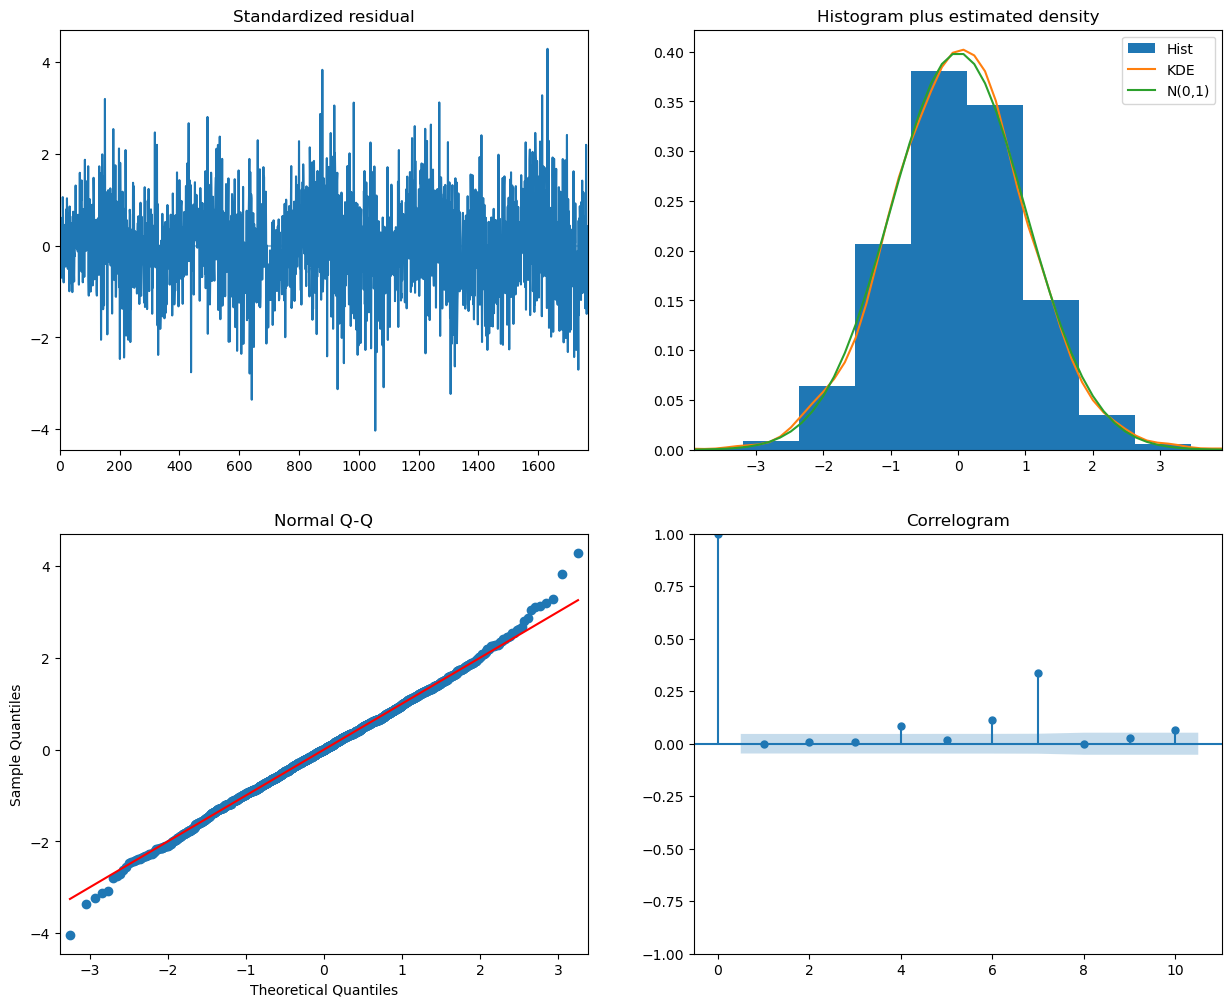

In [8]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [19]:
forecast = SARIMA_model.predict(n_periods = 50)

In [20]:
forecast

1776    26.157129
1777    23.001219
1778    23.695321
1779    23.644572
1780    21.460807
1781    22.453710
1782    22.010931
1783    22.913107
1784    25.330595
1785    23.000985
1786    24.153481
1787    23.873806
1788    22.037835
1789    22.719558
1790    22.233760
1791    22.936049
1792    25.244568
1793    23.099188
1794    24.193566
1795    23.978249
1796    22.099764
1797    22.817132
1798    22.273866
1799    23.005301
1800    25.264528
1801    23.169389
1802    24.229127
1803    24.044886
1804    22.140736
1805    22.880134
1806    22.315585
1807    23.063607
1808    25.306462
1809    23.226099
1810    24.273849
1811    24.100043
1812    22.186997
1813    22.934054
1814    22.362708
1815    23.116436
1816    25.354195
1817    23.278280
1818    24.322261
1819    24.151712
1820    22.235868
1821    22.985336
1822    22.411896
1823    23.167415
1824    25.403615
1825    23.329048
dtype: float64

Text(0.5, 1.0, 'standalone plot of the forecasted data')

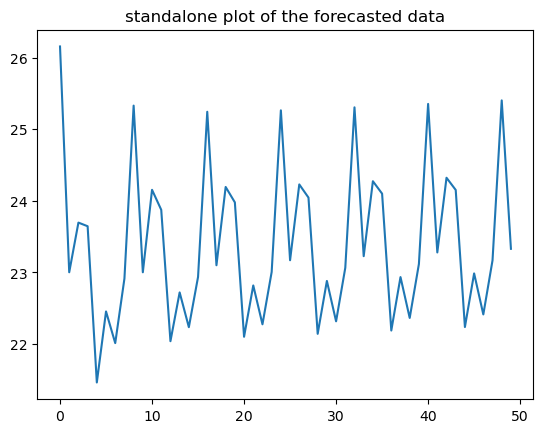

In [21]:
x = [i for i in range(50)]
plt.plot(x,forecast)
plt.title("standalone plot of the forecasted data")

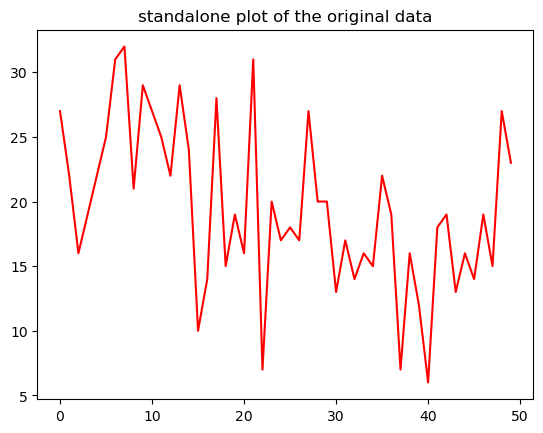

In [22]:
plt.plot(hf,color='red',label = 'original data')
plt.title("standalone plot of the original data")
plt.show()

## Model 2: Support Vector Regression

In [51]:
af

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27


In [52]:
af[['Year', 'Month', 'Day']] = af['date'].str.split('-', expand=True)
af = af.drop(columns='date')

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_15862/4104654208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af[['Year', 'Month', 'Day']] = af['date'].str.split('-', expand=True)
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_15862/4104654208.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af[['Year', 'Month', 'Day']] = af['date'].str.split('-', expand=True)
/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_15862/4104654208.py:1: SettingWithCopyWarning: 
A value i

In [53]:
y = af.iloc[:,2].values
daf = af.drop(columns='sales')
X = af.iloc[:,:].values

In [54]:
X

array([[1, 1, 13, '2013', '01', '01'],
       [1, 1, 11, '2013', '01', '02'],
       [1, 1, 14, '2013', '01', '03'],
       ...,
       [1, 1, 15, '2017', '12', '29'],
       [1, 1, 27, '2017', '12', '30'],
       [1, 1, 23, '2017', '12', '31']], dtype=object)

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [56]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X_train = ms.fit_transform(X_train)
X_test = ms.fit_transform(X_test)

In [57]:
from sklearn.svm import SVR
model = SVR()
model.fit(X_train,y_train)

SVR()

In [58]:
y_predicted = model.predict(X_test)
y_predicted

array([24.01784264, 14.53687598, 22.21919528, 22.51813147, 20.96932493,
       16.21335365, 14.98881268,  9.99908455, 17.07336451, 29.07899742,
       24.95905481, 30.0250819 , 36.61265731, 22.93130098, 31.97811468,
       27.72198553, 18.98436447, 28.10384436, 21.52586255, 28.97706761,
       21.07542297, 30.12579985, 25.54975849, 13.7325316 , 25.24105091,
       22.74294398,  7.28899532, 31.49084009, 23.8230838 , 36.15684567,
       18.72661439, 31.92214453, 11.47813423, 29.67235779, 17.60292282,
       23.95437043, 26.73511791, 26.8287125 , 14.38658404, 34.39370784,
       21.28024662, 29.62059699, 37.67157358, 16.39703661, 32.05733788,
       17.47611292, 15.15766399, 11.66674019, 37.5513941 , 12.1493584 ,
       27.38236739, 25.75201757, 31.19690398, 22.70238852, 26.48176549,
       26.08727594, 19.73186311, 17.42564054, 12.79779804, 18.60752781,
       30.27797542, 30.42086452, 28.99009179, 20.26597907, 18.7340697 ,
       11.5002826 , 34.5317733 , 25.87651988, 17.5662962 , 13.05

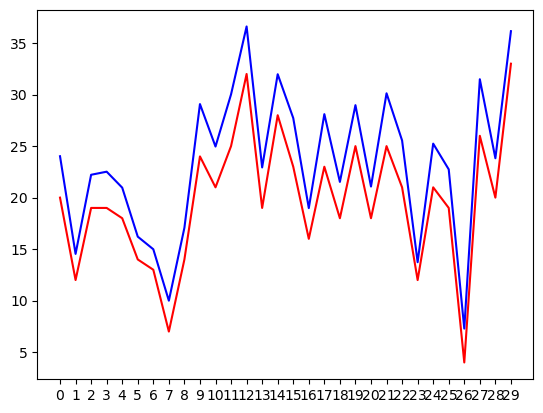

In [59]:
plt.plot(y_test[:30], color="red")
plt.plot(y_predicted[:30], color="blue")
plt.xticks(range(30))
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
mse

12.155613495624655

## Model 3: Decision Tree Regression

In [61]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [62]:
y_predicted = model.predict(X_test)

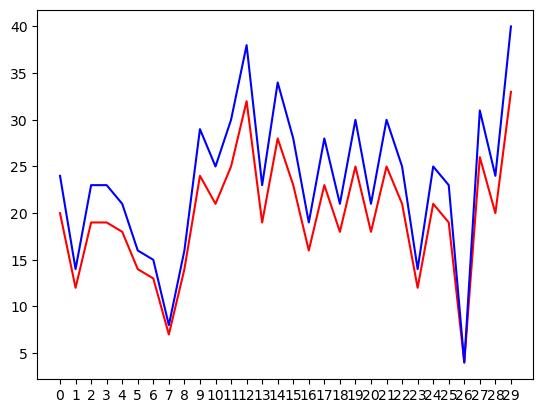

In [63]:
plt.plot(y_test[:30], color="red")
plt.plot(y_predicted[:30], color="blue")
plt.xticks(range(30))
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
mse

16.51912568306011